## Cho mảng a có n phần tử được sắp xếp theo thứ tự tăng dần và một giá trị x bất kì. Kiểm tra xem x có trong mảng không? Nếu có trả về chỉ số của x trong mảng, ngược lại trả về -1.

In [49]:
from random import random

import numpy as np


def BinarySearch(arr, x, left, right):
    if left == right:
        return left if arr[left] == x else -1
    else:
        mid = (left + right) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            return BinarySearch(arr, x, mid + 1, right)
        else:
            return BinarySearch(arr, x, left, mid)

In [79]:
def main():
    x = int(random() * 100)
    arr = [int(random() * 100) for _ in range(20)]
    print(arr)
    print("X = ", x)
    print(BinarySearch(arr, x, 0, len(arr) - 1))


if __name__ == '__main__':
    main()

[99, 67, 82, 33, 75, 45, 84, 7, 39, 92, 11, 86, 43, 54, 83, 95, 45, 88, 4, 44]
X =  1
-1


## Cho mảng a có n phần tử. Sắp xếp mảng a theo thứ tự tăng dần sử dụng phương pháp chia để trị.

In [85]:
def QuickSort(arr, left, right):
    if left < right:
        pivot = arr[right]
        i = left - 1
        for j in range(left, right):
            if arr[j] < pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[right] = arr[right], arr[i + 1]
        QuickSort(arr, left, i)
        QuickSort(arr, i + 2, right)
    return arr


In [182]:
def main():
    A = [int(random() * 100) for _ in range(10)]
    print(A)
    print(QuickSort(A, 0, len(A) - 1))


if __name__ == '__main__':
    main()

[67, 83, 35, 88, 96, 27, 12, 18, 30, 69]
[12, 18, 27, 30, 35, 67, 69, 83, 88, 96]


## Cho

In [183]:
def min(Arr, left, right):
    if left == right:
        return Arr[left]
    else:
        mid1 = min(Arr, left, (left + right) // 2)
        mid2 = min(Arr, (left + right) // 2 + 1, right)
        return mid1 if mid1 < mid2 else mid2


def max(Arr, left, right):
    if left == right:
        return Arr[left]
    else:
        max1 = max(Arr, left, (left + right) // 2)
        max2 = max(Arr, (left + right) // 2 + 1, right)
        return max1 if max1 > max2 else max2

In [188]:
def main():
    A = [int(random() * 100) for _ in range(10)]
    print(A)
    print("Min = ", min(A, 0, len(A) - 1))
    print("Max = ", max(A, 0, len(A) - 1))


if __name__ == '__main__':
    main()

[3, 53, 95, 41, 66, 46, 21, 97, 11, 13]
Min =  3
Max =  97


## Bài toán nhân ma trận không vuông

In [235]:
def multiplyMatrix(mtriA, mtriB):
    mtriC = [[0 for _ in range(len(mtriB[0]))] for _ in range(len(mtriA))]
    for i in range(len(mtriA)):
        for j in range(len(mtriB[0])):
            for k in range(len(mtriB)):
                mtriC[i][j] += mtriA[i][k] * mtriB[k][j]
    return mtriC


## Nhân ma trận không vuông sử dụng thuật toán Strassen

In [236]:
def strassen(matriA, matriB, n):
    if n == 1:
        return matriA * matriB

    mid = n // 2

    A11, A12 = matriA[:mid, :mid], matriA[:mid, mid:]
    A21, A22 = matriA[mid:, :mid], matriA[mid:, mid:]
    B11, B12 = matriB[:mid, :mid], matriB[:mid, mid:]
    B21, B22 = matriB[mid:, :mid], matriB[mid:, mid:]

    M1 = strassen(A11 + A22, B11 + B22, mid)
    M2 = strassen(A21 + A22, B11, mid)
    M3 = strassen(A11, B12 - B22, mid)
    M4 = strassen(A22, B21 - B11, mid)
    M5 = strassen(A11 + A12, B22, mid)
    M6 = strassen(A21 - A11, B11 + B12, mid)
    M7 = strassen(A12 - A22, B21 + B22, mid)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

In [ ]:
import time
import matplotlib.pyplot as plt

def measure_time(method, sizes):
    times = []
    for size in sizes:
        A = np.random.randint(1, 1000, (size, size))
        B = np.random.randint(1, 1000, (size, size))
        start = time.time()
        method(A, B, size) if method == strassen else method(A, B)
        times.append(time.time() - start)
    return times

sizes = [2, 4, 8, 16, 32, 64]
traditional_times = measure_time(multiplyMatrix, sizes)
strassen_times = measure_time(strassen, sizes)

plt.plot(sizes, traditional_times, label='Traditional Method', marker='o')
plt.plot(sizes, strassen_times, label='Strassen Method', marker='s')
plt.xlabel('nxn')
plt.ylabel('Time (s)')
plt.title('22001534_BuiThoAn')
plt.legend()
plt.grid()
plt.show()


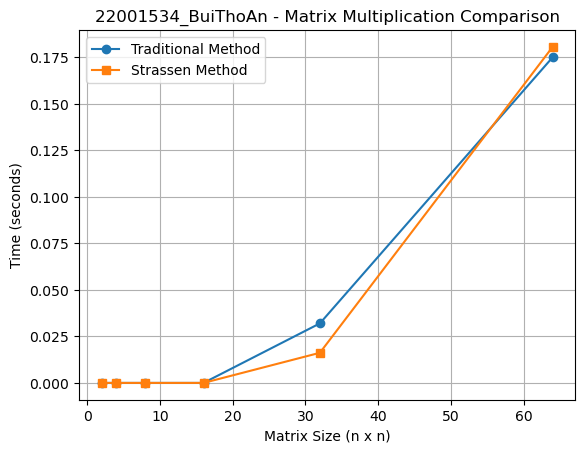

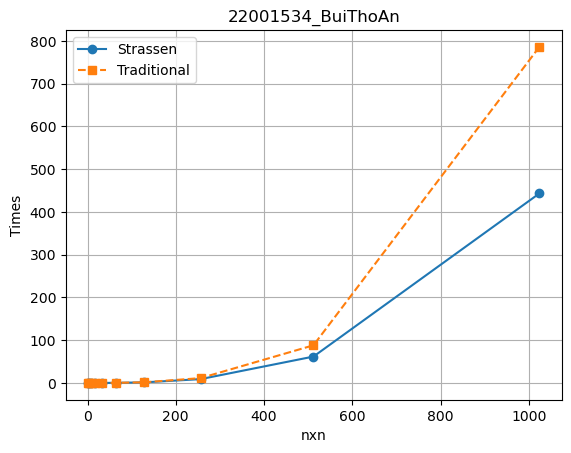

In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt

def multiplyMatrix(mtriA, mtriB):
    mtriC = np.zeros((len(mtriA), len(mtriB[0])))
    for i in range(len(mtriA)):
        for j in range(len(mtriB[0])):
            for k in range(len(mtriB)):
                mtriC[i][j] += mtriA[i][k] * mtriB[k][j]
    return mtriC

def split_matrix(matrix):
    n = matrix.shape[0]
    mid = n // 2
    return (
        matrix[:mid, :mid].copy(), matrix[:mid, mid:].copy(),
        matrix[mid:, :mid].copy(), matrix[mid:, mid:].copy()
    )

def strassen(A, B, n, threshold=64):
    if n <= threshold:  # Dùng nhân truyền thống khi N nhỏ
        return multiplyMatrix(A, B)

    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    M1 = strassen(A11 + A22, B11 + B22, n // 2, threshold)
    M2 = strassen(A21 + A22, B11, n // 2, threshold)
    M3 = strassen(A11, B12 - B22, n // 2, threshold)
    M4 = strassen(A22, B21 - B11, n // 2, threshold)
    M5 = strassen(A11 + A12, B22, n // 2, threshold)
    M6 = strassen(A21 - A11, B11 + B12, n // 2, threshold)
    M7 = strassen(A12 - A22, B21 + B22, n // 2, threshold)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

sizes = [2**i for i in range(1,5)]
times_strassen = []
times_traditional = []

for size in sizes:
    A = np.random.randint(0, 10, (size, size)).astype(np.int32)
    B = np.random.randint(0, 10, (size, size)).astype(np.int32)

    start_time = time.time()
    strassen(A, B, size)
    elapsed_time_strassen = time.time() - start_time
    times_strassen.append(elapsed_time_strassen)

    start_time = time.time()
    multiplyMatrix(A, B)
    elapsed_time_traditional = time.time() - start_time
    times_traditional.append(elapsed_time_traditional)

# Vẽ biểu đồ so sánh
plt.plot(sizes, times_strassen, marker='o', linestyle='-', label='Strassen')
plt.plot(sizes, times_traditional, marker='s', linestyle='--', label='Traditional')
plt.xlabel("nxn")
plt.ylabel("Times")
plt.title("22001534_BuiThoAn")
plt.legend()
plt.grid(True)
plt.show()

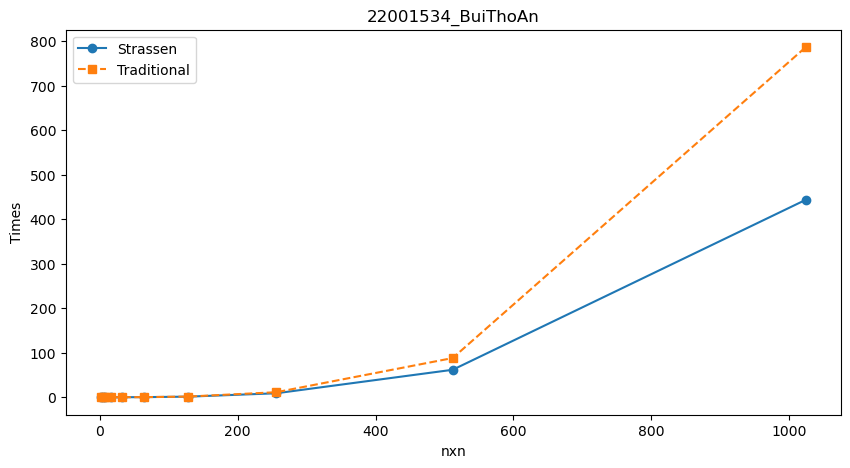

In [31]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 5))
plt.plot(sizes, times_strassen, marker='o', linestyle='-', label='Strassen')
plt.plot(sizes, times_traditional, marker='s', linestyle='--', label='Traditional')
plt.xlabel("nxn")
plt.ylabel("Times")
plt.title("22001534_BuiThoAn")
plt.legend()
plt.show()

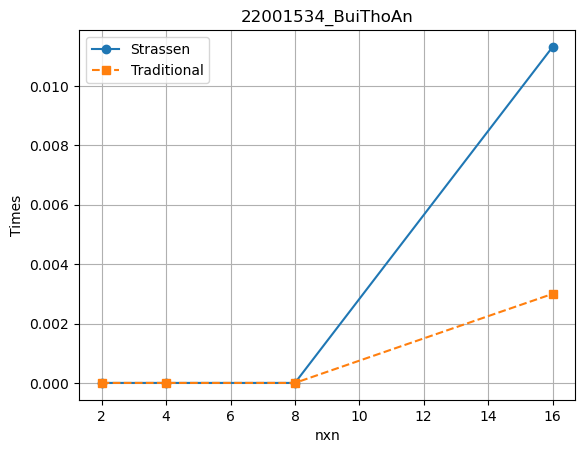

In [34]:
import numpy as np
import time
import matplotlib.pyplot as plt

def multiplyMatrix(mtriA, mtriB):
    mtriC = np.zeros((len(mtriA), len(mtriB[0])))
    for i in range(len(mtriA)):
        for j in range(len(mtriB[0])):
            for k in range(len(mtriB)):
                mtriC[i][j] += mtriA[i][k] * mtriB[k][j]
    return mtriC

def split_matrix(matrix):
    n = matrix.shape[0]
    mid = n // 2
    return (
        matrix[:mid, :mid].copy(), matrix[:mid, mid:].copy(),
        matrix[mid:, :mid].copy(), matrix[mid:, mid:].copy()
    )

def strassen(A, B, n, threshold=64):
    if n <= threshold:  # Dùng nhân truyền thống khi N nhỏ
        return multiplyMatrix(A, B)

    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    M1 = strassen(A11 + A22, B11 + B22, n // 2, threshold)
    M2 = strassen(A21 + A22, B11, n // 2, threshold)
    M3 = strassen(A11, B12 - B22, n // 2, threshold)
    M4 = strassen(A22, B21 - B11, n // 2, threshold)
    M5 = strassen(A11 + A12, B22, n // 2, threshold)
    M6 = strassen(A21 - A11, B11 + B12, n // 2, threshold)
    M7 = strassen(A12 - A22, B21 + B22, n // 2, threshold)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return C

sizes = [2**i for i in range(1,5)]
times_strassen = []
times_traditional = []

for size in sizes:
    A = np.random.randint(0, 10, (size, size)).astype(np.int32)
    B = np.random.randint(0, 10, (size, size)).astype(np.int32)

    start_time = time.time()
    strassen(A, B, size)
    elapsed_time_strassen = time.time() - start_time
    times_strassen.append(elapsed_time_strassen)

    start_time = time.time()
    multiplyMatrix(A, B)
    elapsed_time_traditional = time.time() - start_time
    times_traditional.append(elapsed_time_traditional)

# Vẽ biểu đồ so sánh
plt.plot(sizes, times_strassen, marker='o', linestyle='-', label='Strassen')
plt.plot(sizes, times_traditional, marker='s', linestyle='--', label='Traditional')
plt.xlabel("nxn")
plt.ylabel("Times")
plt.title("22001534_BuiThoAn")
plt.legend()
plt.grid(True)
plt.show()